In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dfmat = pd.read_csv(r'C:\Users\User\Desktop\jupyter notebook files\dataset\student-mat.csv', delimiter=';')
dfpor = pd.read_csv(r'C:\Users\User\Desktop\jupyter notebook files\dataset\student-por.csv',delimiter=';')


dataframe = [dfmat, dfpor]
df = pd.concat(dataframe)
df.drop(["school","age"], axis=1, inplace=True)


# get average grade from G1, G2 and G3
df['AvgGrade'] = (df['G1'] + df['G2'] + df['G3']) / 3
# Create grade columns
def define_grade(df):
    # Create a list to store the df
    grades = []
    # For each row in the column,
    for row in df['AvgGrade']:
        # if more than a value,
        if row >= 18: 
            # Append a letter grade
            grades.append('A')
        # else, if more than a value,
        elif row >= 16:
            # Append a letter grade
            grades.append('B')
        # else, if more than a value,
        elif row >= 14: 
            # Append a letter grade
            grades.append('C')   
        elif row >= 12: 
            # Append a letter grade
            grades.append('D') 
        elif row <= 11.9:
            # Append a letter grade
            grades.append('F') 
    # Create a column from the list
    df['grades'] = grades
    return df
df = define_grade(df)

def define_PorF(df):
    # Create a list to store the df
    PorFs = []
    # For each row in the column,
    for row in df['AvgGrade']:
        # if more than a value,
        if row >= 12: 
            # Append a letter PorF
            PorFs.append('P')
        elif row <= 11.9:
            # Append a letter PorF
            PorFs.append('F') 
    # Create a column from the list
    df['PorF'] = PorFs
    return df
df = define_PorF(df)
# print(df['PorF'].value_counts())

In [2]:
# df['PorF']

In [3]:
# for yes / no values:
d = {'no': 0, 'yes': 1}
df['schoolsup'] = df['schoolsup'].map(d)
df['famsup'] = df['famsup'].map(d)
df['paid'] = df['paid'].map(d)
df['activities'] = df['activities'].map(d)
df['nursery'] = df['nursery'].map(d)
df['higher'] = df['higher'].map(d)
df['internet'] = df['internet'].map(d)
df['romantic'] = df['romantic'].map(d)

# map the sex df
d = {'F': 1, 'M': 0}
df['sex'] = df['sex'].map(d)
# map the address df
d = {'U': 1, 'R': 0}
df['address'] = df['address'].map(d)
# map the family size size df
d = {'LE3': 1, 'GT3': 0}
df['famsize'] = df['famsize'].map(d)
# map the parent's status
d = {'T': 1, 'A': 0}
df['Pstatus'] = df['Pstatus'].map(d)
# map the parent's job
d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
df['Mjob'] = df['Mjob'].map(d)
df['Fjob'] = df['Fjob'].map(d)
# map the reason df
d = {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
df['reason'] = df['reason'].map(d)
# map the guardian df
d = {'mother': 0, 'father': 1, 'other': 2}
df['guardian'] = df['guardian'].map(d)
# map the grades df
d = {'F': 0, 'D': 1, 'C': 2, 'B': 3 , 'A': 4}
df['grades'] = df['grades'].map(d)
# map Pass or Fail df
d = {'F': 0, 'P': 1}
df['PorF'] = df['PorF'].map(d)

In [4]:
# df.nunique()

In [5]:
df.columns.values

array(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'AvgGrade',
       'grades', 'PorF'], dtype=object)

In [16]:
X = df.drop(['famsup','activities','nursery', 'famsize','famrel','sex','guardian','Pstatus',
             'paid','health','romantic','Fjob','freetime','G1','G2','G3','PorF'], axis='columns')
Y = df['AvgGrade']


# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# coltrans = ColumnTransformer(
#     [('one_hot_encoder', OneHotEncoder(categories='auto'), [1,6])] #[1,6] 1 = sex, 6 = who
#     , remainder='passthrough'
# )






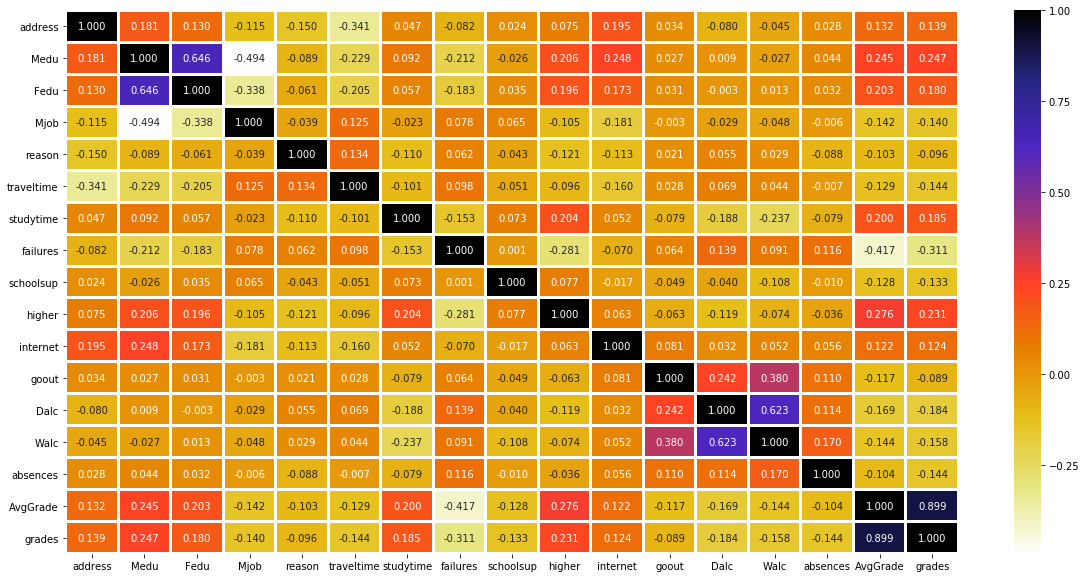

In [17]:
X.head()
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(method='spearman'),annot=True,cmap='CMRmap_r',fmt='.3f',linewidths=2)
plt.show()

In [8]:
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=6)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [9]:
# # Decision Trees
# modelDT = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
# modelDT.fit(x_train, y_train)

# # print(x_test.iloc[0])
# # print(y_test.iloc[0])
# print(round(modelDT.score(x_test, y_test)*100,2),'%')

# # K-nearest Neighbours
# from sklearn.neighbors import KNeighborsClassifier
# modelKn = KNeighborsClassifier()
# modelKn.fit(x_train,y_train)
# print(round(modelKn.score(x_test,y_test)*100,2),'%')

# # Logistic regression (modellog)
# from sklearn.linear_model import LogisticRegression
# modellog = LogisticRegression(solver='liblinear')
# modellog.fit(x_train, y_train)

# print(round(modellog.score(x_test, y_test)*100,2),'%')
# print(x_test.iloc[0])
# # print(y_test.iloc[0])
# # print(modellog.predict(x_test[0].reshape(1,-1)))

In [10]:
# # Predict using own variable
# print(model.predict([[0,1,1,0,0,1,5,1,2,1,0,0,]]))

In [11]:
# # create model
import keras
import warnings
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() #single stack of layers, connected sequentially
model.add(Dense(20, input_dim=16, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


tbCallBack = keras.callbacks.TensorBoard(log_dir='/tmp/keras_logs',
write_graph=True)

# Compile model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']
             )

# Fit the model
model.fit(x_train,
          y_train,
          epochs=100,  # Number of repetation process (try different number for best option)
          batch_size=50,  #  to specify the number of observation after which you want to update weight
          verbose=1,  # 1 for verbose for printing the model fitting process on screen
#           callbacks=[Earlystopping]
          callbacks=[tbCallBack]
         )


Using TensorFlow backend.
W0722 20:32:38.926156 15124 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 20:32:38.972166 15124 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 20:32:38.980170 15124 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                340       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


W0722 20:32:41.970922 15124 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0722 20:32:42.040943 15124 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0722 20:32:42.055945 15124 deprecation.py:323] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0722 20:32:42.759122 15124 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assig

Epoch 1/100
939/939 [==============================] - 1s 783us/step - loss: 4.1244 - acc: 0.0000e+00
Epoch 2/100
939/939 [==============================] - 0s 86us/step - loss: -6.6912 - acc: 0.0000e+00
Epoch 3/100
939/939 [==============================] - 0s 103us/step - loss: -19.8333 - acc: 0.0000e+00
Epoch 4/100
939/939 [==============================] - 0s 124us/step - loss: -50.0691 - acc: 0.0000e+00
Epoch 5/100
939/939 [==============================] - 0s 102us/step - loss: -109.8029 - acc: 0.0000e+00
Epoch 6/100
939/939 [==============================] - 0s 93us/step - loss: -159.0923 - acc: 0.0000e+00
Epoch 7/100
939/939 [==============================] - 0s 99us/step - loss: -162.9739 - acc: 0.0000e+00
Epoch 8/100
939/939 [==============================] - 0s 94us/step - loss: -162.9892 - acc: 0.0000e+00
Epoch 9/100
939/939 [==============================] - 0s 108us/step - loss: -162.9892 - acc: 0.0000e+00
Epoch 10/100
939/939 [==============================] - 0s 108us/s

939/939 [==============================] - 0s 72us/step - loss: -162.9892 - acc: 0.0000e+00
Epoch 79/100
939/939 [==============================] - 0s 85us/step - loss: -162.9892 - acc: 0.0000e+00
Epoch 80/100
939/939 [==============================] - 0s 108us/step - loss: -162.9892 - acc: 0.0000e+00
Epoch 81/100
939/939 [==============================] - 0s 149us/step - loss: -162.9892 - acc: 0.0000e+00
Epoch 82/100
939/939 [==============================] - 0s 135us/step - loss: -162.9892 - acc: 0.0000e+00
Epoch 83/100
939/939 [==============================] - 0s 89us/step - loss: -162.9892 - acc: 0.0000e+00
Epoch 84/100
939/939 [==============================] - 0s 89us/step - loss: -162.9892 - acc: 0.0000e+00
Epoch 85/100
939/939 [==============================] - 0s 78us/step - loss: -162.9892 - acc: 0.0000e+00
Epoch 86/100
939/939 [==============================] - 0s 80us/step - loss: -162.9892 - acc: 0.0000e+00
Epoch 87/100
939/939 [==============================] - 0s 82us/s

In [12]:
# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
# y_pred

In [13]:
from sklearn.metrics import accuracy_score

acs = accuracy_score(y_test, y_pred)
print("\nAccuracy Score: %.2f%%" % (acs * 100))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 


# print(round(model.score(x_test, y_test)*100,2),'%')
# print(x_test[0])
# print(y_test.iloc[0])
# print(model.predict(x_test[0].reshape(1,-1)))
# print(x_test[0].reshape(1,-1))



ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
x_test.head()

In [ ]:
model.predict(np.array([[1,2,1,4,0,1,1,0,1,1,1,2,1,1,4,0]]).reshape(1, -1))